# Social Network Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from ast import literal_eval
import re

custom function

In [54]:
def export_json(data:dict, export_name:str, indent:int = 4):
  import json
  with open(export_name, 'w') as f:
    json.dump(data, f, indent=indent)

In [2]:
data = pd.read_csv('./data/tsv/data.tsv', sep="\t")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428 entries, 0 to 5427
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     5395 non-null   object
 1   username    5428 non-null   object
 2   mentioned   5428 non-null   object
 3   rawContent  5428 non-null   object
dtypes: object(4)
memory usage: 169.8+ KB


## Building Graph

In [6]:
data['mentioned'] = data['mentioned'].apply(lambda x: literal_eval(x))

membuat list edges/links berdasarkan username dengan mention untuk attribut `weight` menggunakan seberapa banyak username dan mentioned berinteraksi 

In [7]:
G = nx.DiGraph()
for interaction in data.iloc:
    for mention in interaction.mentioned:
        source, target = interaction.username, re.sub(r'@', '' ,mention)
        if G.has_edge(source, target):
            G[source][target]["weight"] += 1
        else:
            G.add_edge(source, target, weight=1)
edgelist = nx.to_pandas_edgelist(G).sort_values(by="weight", ascending=False, ignore_index=True)

In [8]:
edgelist.sort_values(by='weight', ascending=False).head(10)

,source,target,weight
0,hyuckbestiee,nuna_konser,11
1,IDWantsColdplay,coldplay,8
2,fnfj_,IDWantsColdplay,7
3,missoriginalsix,coldplay,7
4,missoriginalsix,IDWantsColdplay,7
5,nasyaElpnt,coldplay,7
6,fnfj_,coldplay,7
7,rohitsebastiian,coldplay,6
8,rohitsebastiian,IDWantsColdplay,6
9,thebuzzzsixties,idextratime,6


In [9]:
chart_label = []
chart_size = []
for num, x in edgelist.groupby(by='weight'):
  chart_label.append(num)
  chart_size.append(len(x))

persebaran weight tiap edges

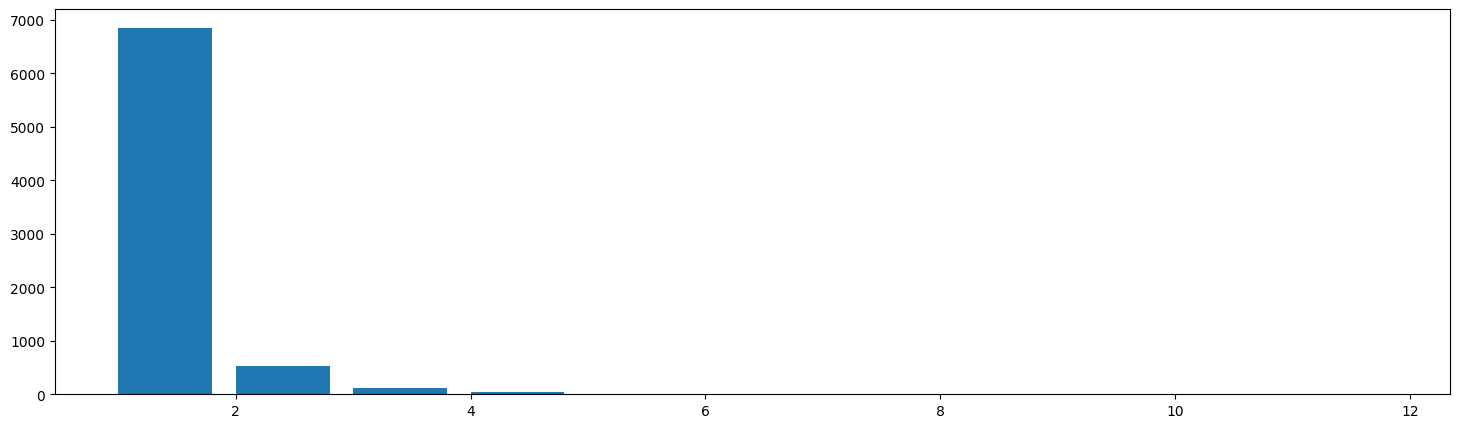

In [10]:
plt.figure(figsize=(18,5))
plt.bar(chart_label, chart_size, align='edge')
plt.show()

In [17]:
# temporary list
sources = list(set(edgelist.source))
targets = list(set(edgelist.target))
nodes = list(set(sources + targets))

# change names to id as primary
nodelist = pd.DataFrame(nodes).reset_index()
nodelist.columns = ["id", "name"]
nodelist["id"] = np.arange(1, len(nodelist) + 1)

# mengambil id berdasarkan nama atau sebaliknya
node_dict = {k: v for k, v in zip(nodelist.name, nodelist.id)}
name_dict = {k: v for k, v in zip(nodelist.id, nodelist.name)}

# temporary variable
nodes = node_dict.keys()
node_ids = node_dict.values()
sources = [node_dict.get(s) for s in edgelist.source]
targets = [node_dict.get(s) for s in edgelist.target]
weights = [w for w in edgelist.weight]

# temporary list
edge_tuples = []
for s, t, w in zip(sources, targets, weights):
    edge_tuples.append((s, t, w))

In [18]:
G = nx.Graph()
G.add_nodes_from(list(node_ids))
G.add_weighted_edges_from(edge_tuples)

In [19]:
groups = nx.algorithms.community.louvain_communities(G)
test_groups = dict()
for i, x in enumerate(groups):
    for node in x:
        test_groups[node] = i + 1
groups = pd.DataFrame(test_groups.items(), columns=["id", "groups"]).sort_values(by="id", ignore_index=True)

In [20]:
nx.set_node_attributes(G, name="category", values=groups["groups"].to_dict())
nx.set_node_attributes(G, name="name", values=name_dict)

In [21]:
degree = nx.algorithms.centrality.degree_centrality(G)
nx.set_node_attributes(G, name="degree", values=degree)

In [42]:
dc_g = pd.DataFrame(degree.items(), columns=['id', 'degree']).sort_values(by='degree', ascending=False)
dc_g['username'] = dc_g['id'].apply(lambda x: G.nodes.get(x)['name'])

In [43]:
dc_g.head(10)

,id,degree,username
1596,1597,0.196019,coldplay
6969,6970,0.102090,IDWantsColdplay
3580,3581,0.044674,tanyakanrl
5314,5315,0.025344,westenthu
3704,3705,0.023769,idextratime
5703,5704,0.019759,coldplayxtra
4496,4497,0.019330,BonnySidharta
5629,5630,0.018184,coldplaying
5942,5943,0.008162,santo91192
6724,6725,0.007875,tixseoulution


In [23]:
betweenness = nx.algorithms.centrality.betweenness_centrality(G, weight="weight")
nx.set_node_attributes(G, name="betweenness", values=betweenness)

In [44]:
bc_g = pd.DataFrame(betweenness.items(), columns=['id', 'bc']).sort_values(by='bc', ascending=False)
bc_g['username'] = bc_g['id'].apply(lambda x: G.nodes.get(x)['name'])

In [45]:
bc_g.head(10)

,id,bc,username
1596,1597,0.196991,coldplay
3580,3581,0.056255,tanyakanrl
5314,5315,0.043148,westenthu
6969,6970,0.041314,IDWantsColdplay
3704,3705,0.033345,idextratime
4496,4497,0.025140,BonnySidharta
1817,1818,0.023031,celixalexandra
5820,5821,0.020670,tmlnsnxlouiss
6560,6561,0.013763,7Jktoru
5206,5207,0.012442,tawakkaI


In [25]:
eigenvector = nx.algorithms.centrality.eigenvector_centrality_numpy(G, weight="weight")
nx.set_node_attributes(G, name="eigenvector", values=eigenvector)

In [46]:
ec_g = pd.DataFrame(eigenvector.items(), columns=['id', 'ec']). sort_values(by='ec', ascending=False)
ec_g['username'] = ec_g['id'].apply(lambda x: G.nodes.get(x)['name'])

In [47]:
ec_g.head(10)

,id,ec,username
1596,1597,0.576797,coldplay
6969,6970,0.397158,IDWantsColdplay
3090,3091,0.113896,missoriginalsix
1713,1714,0.111161,fnfj_
3820,3821,0.100109,rohitsebastiian
5703,5704,0.075965,coldplayxtra
2938,2939,0.074183,GRhs292374
4847,4848,0.068934,nasyaElpnt
2660,2661,0.065988,bulanaprilduarb
839,840,0.065332,jijunnnn


export hasil graph ke json

In [55]:
export_json(nx.readwrite.json_graph.node_link_data(G), './out/output.json')

custom function

In [ ]:
def create_graph(edgelist:pd.DataFrame):
  # temporary list
  sources = list(set(edgelist.source))
  targets = list(set(edgelist.target))
  nodes = list(set(sources + targets))

  # change names to id as primary
  nodelist = pd.DataFrame(nodes).reset_index()
  nodelist.columns = ["id", "name"]
  nodelist["id"] = np.arange(1, len(nodelist) + 1)

  # mengambil id berdasarkan nama atau sebaliknya
  node_dict = {k: v for k, v in zip(nodelist.name, nodelist.id)}
  name_dict = {k: v for k, v in zip(nodelist.id, nodelist.name)}

  # temporary variable
  nodes = node_dict.keys()
  node_ids = node_dict.values()
  sources = [node_dict.get(s) for s in edgelist.source]
  targets = [node_dict.get(s) for s in edgelist.target]
  weights = [w for w in edgelist.weight]

  # temporary list
  edge_tuples = []
  for s, t, w in zip(sources, targets, weights):
      edge_tuples.append((s, t, w))
      
  G = nx.Graph()
  G.add_nodes_from(list(node_ids))
  G.add_weighted_edges_from(edge_tuples)
  
  groups = nx.algorithms.community.louvain_communities(G)
  test_groups = dict()
  for i, x in enumerate(groups):
      for node in x:
          test_groups[node] = i + 1
  groups = pd.DataFrame(test_groups.items(), columns=["id", "groups"]).sort_values(by="id", ignore_index=True)
  
  nx.set_node_attributes(G, name="category", values=groups["groups"].to_dict())
  nx.set_node_attributes(G, name="name", values=name_dict)
  degree = nx.algorithms.centrality.degree_centrality(G)
  nx.set_node_attributes(G, name="degree", values=degree)
  betweenness = nx.algorithms.centrality.betweenness_centrality(G, weight="weight")
  nx.set_node_attributes(G, name="betweenness", values=betweenness)
  eigenvector = nx.algorithms.centrality.eigenvector_centrality_numpy(G, weight="weight")
  nx.set_node_attributes(G, name="eigenvector", values=eigenvector)
  
  return {
    "Graph": G,
    "degree": degree,
    "betweenness": betweenness,
    "eigenvector": eigenvector
  }

## Mengambil hanya edge yang memiliki weight > 1

In [12]:
edgelist_gt1 = edgelist[edgelist['weight'] > 1]

In [13]:
G_gt1 = create_graph(edgelist_gt1)

In [30]:
Graph_of_gt1:nx.DiGraph = G_gt1['Graph']

In [48]:
dc_ggte1 = pd.DataFrame(G_gt1['degree'].items(), columns=['id', 'dc']).sort_values(by="dc", ascending=False)
dc_ggte1['username'] = dc_ggte1['id'].apply(lambda x: Graph_of_gt1.nodes.get(x)['name'])

In [49]:
dc_ggte1.head(10)

,id,dc,username
486,487,0.367816,coldplay
582,583,0.220033,IDWantsColdplay
201,202,0.027915,tanyakanrl
351,352,0.021346,idextratime
262,263,0.019704,BonnySidharta
68,69,0.018062,coldplayxtra
578,579,0.016420,coldplaying
185,186,0.016420,butikhnw
392,393,0.011494,ColdplayMsia
187,188,0.011494,westenthu


In [50]:
bc_ggte1 = pd.DataFrame(G_gt1['betweenness'].items(), columns=['id', 'bc']).sort_values(by="bc", ascending=False)
bc_ggte1['username'] = bc_ggte1['id'].apply(lambda x: Graph_of_gt1.nodes.get(x)['name'])

In [51]:
bc_ggte1.head(10)

,id,bc,username
486,487,0.185569,coldplay
582,583,0.044477,IDWantsColdplay
21,22,0.006179,Qasrinaa
394,395,0.003183,ewropp
391,392,0.003127,shiru_ka21
583,584,0.003127,itsyourbill
371,372,0.003127,gagituraiii
301,302,0.003127,vliffadam
576,577,0.003122,gadisoengoe
311,312,0.002339,herjunxt


In [52]:
ec_ggte1 = pd.DataFrame(G_gt1['eigenvector'].items(), columns=['id', 'ec']).sort_values(by="ec", ascending=False)
ec_ggte1['username'] = ec_ggte1['id'].apply(lambda x: Graph_of_gt1.nodes.get(x)['name'])

In [53]:
ec_ggte1.head(10)

,id,ec,username
486,487,0.577037,coldplay
582,583,0.450891,IDWantsColdplay
150,151,0.144361,missoriginalsix
25,26,0.142746,fnfj_
524,525,0.124934,rohitsebastiian
547,548,0.092870,GRhs292374
168,169,0.084515,nasyaElpnt
88,89,0.082401,bulanaprilduarb
511,512,0.081955,luvmatch4
366,367,0.081569,pnksbbs


In [57]:
export_json(nx.readwrite.node_link_data(Graph_of_gt1), './out/output_gt1.json')